Build a model to forecast demand(passenger traffic) in Airplanes. The dats is classified in date/time and the passengers travelling per month

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
dataset = pd.read_csv("AirPassengers.csv")

In [3]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Parse the strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset = dataset.set_index(["Month"])

In [5]:
dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
from datetime import datetime
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
indexedDataset.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


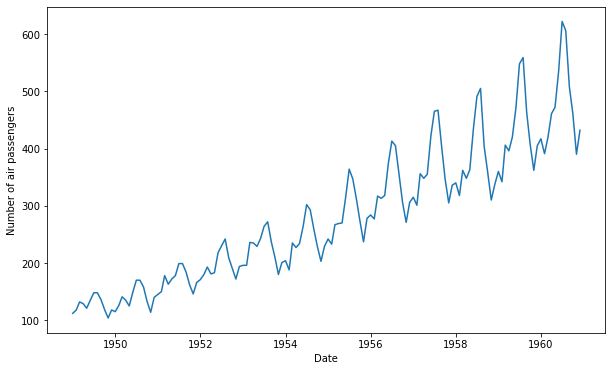

In [8]:
# plot the graph
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

In [9]:
# determining the rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


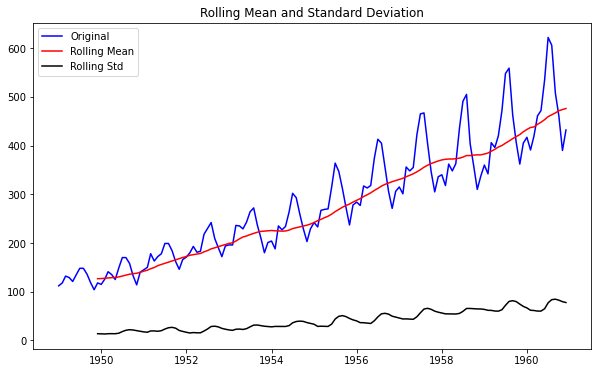

In [11]:
# plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [13]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller Test:")
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


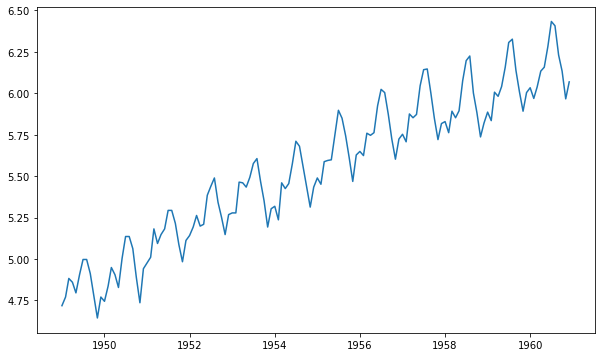

In [16]:
# Estimated trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

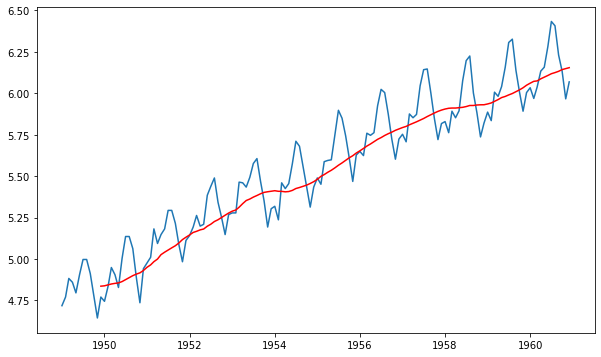

In [20]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [21]:
# the difference between moving average and actual number of passenger
datasetLogScaleMinusMovingAverage = indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [22]:
# Removing NUll Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [30]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    #plot rolling statistics
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(movingAverage, color="red", label="Rolling Mean")
    std = plt.plot(movingSTD, color="black", label="Rolling STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)
    
    #Perform Dickey fullers  test:
    print("Result of Dickey-Fuller Test")
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'p-value','#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

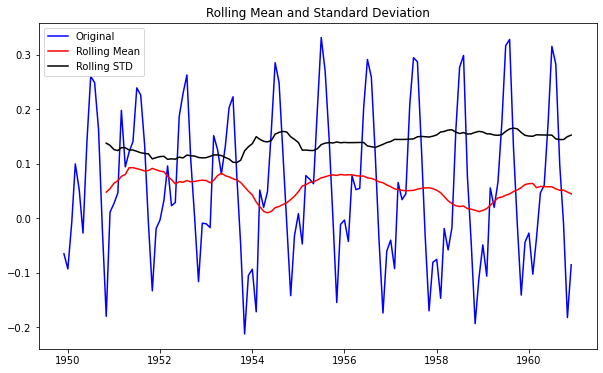

Result of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [31]:
test_stationary(datasetLogScaleMinusMovingAverage)

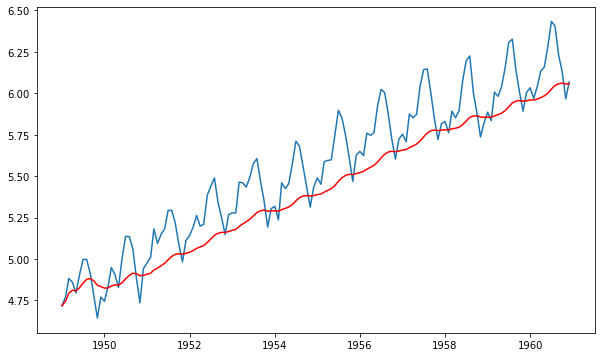

In [36]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color="red")

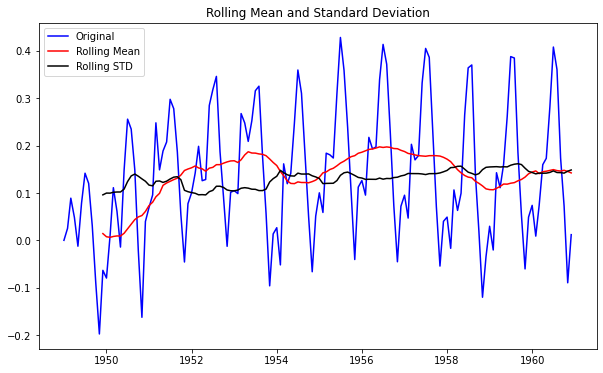

Result of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [39]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

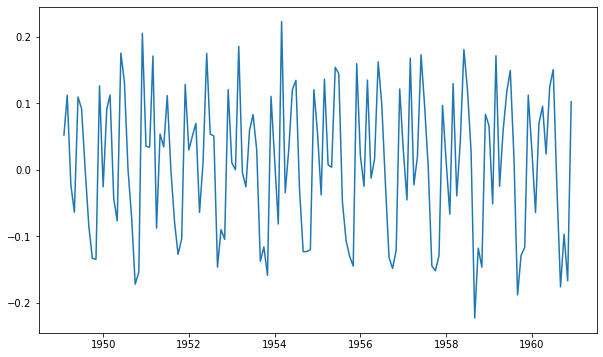

In [40]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

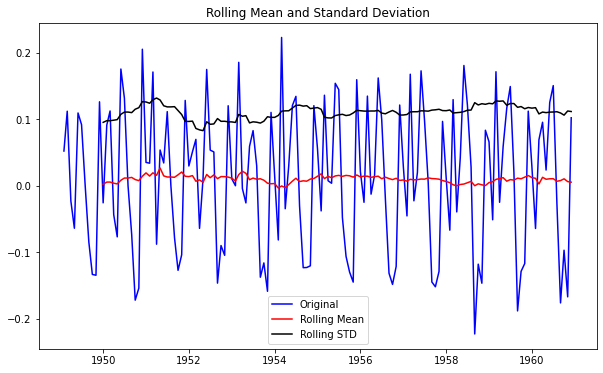

Result of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [41]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

Month
1949-01-01   -0.085815
1949-02-01   -0.114413
1949-03-01    0.018113
1949-04-01   -0.013046
1949-05-01   -0.008966
                ...   
1960-08-01    0.204512
1960-09-01    0.064836
1960-10-01   -0.075271
1960-11-01   -0.215846
1960-12-01   -0.100315
Name: seasonal, Length: 144, dtype: float64

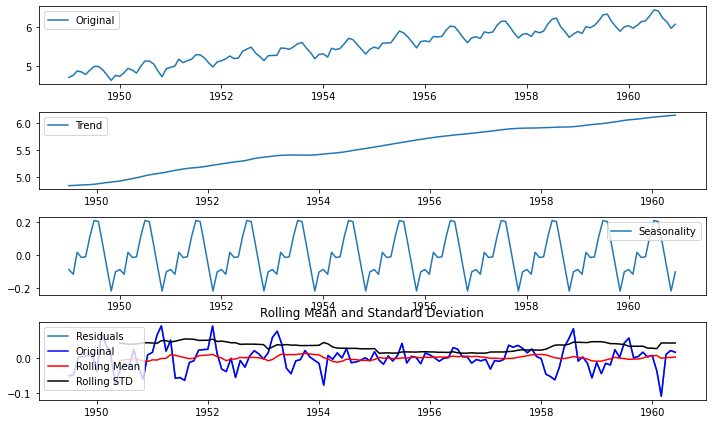

Result of Dickey-Fuller Test


KeyError: '#Passengers'

In [49]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label="Residuals")
plt.legend(loc="best")
plt.tight_layout()
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

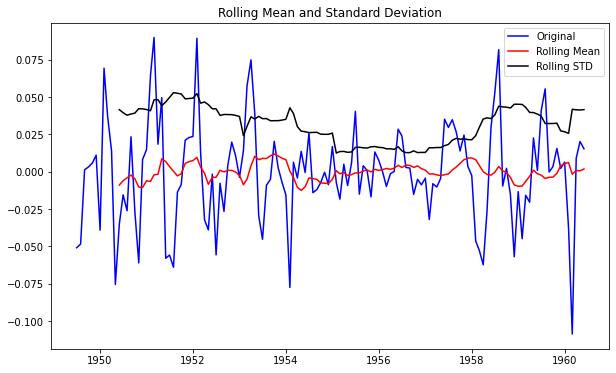

Result of Dickey-Fuller Test


KeyError: '#Passengers'

In [50]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

In [51]:
decomposedLogData.head()

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
Name: resid, dtype: float64